# Imports

In [1]:
import os
from os import walk
from os.path import join
import glob
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams


%matplotlib inline


# Data Visualization
###  For this phase I combined all the data from 2014, 2015, 2016 into a single CSV file
### The Data has 3 ulabeled columns

In [2]:
data=pd.read_csv('TEC_combined/TEC_combined_all.csv')

data.shape

(1646788, 3)

In [3]:
data_nonzero=data.loc[(data!=0).any(axis=1)]
data_nonzero.shape

(1024664, 3)

C:\Users\aayus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


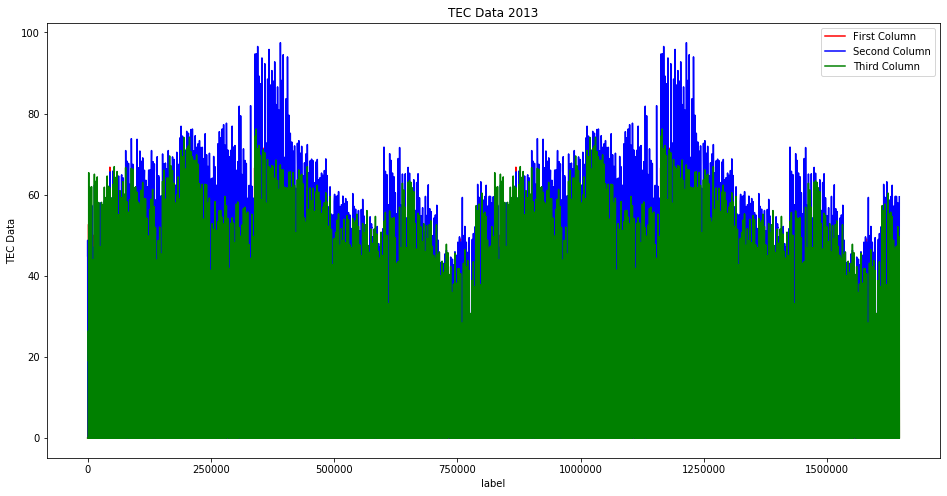

In [4]:
plt.figure(figsize=(16,8))
plt.plot(data_nonzero["0"], color='red', label="First Column")
plt.plot(data_nonzero["0.1"], color='blue', label="Second Column")
plt.plot(data_nonzero["0.2"], color='green', label="Third Column")

plt.title("TEC Data Combined")
plt.xlabel("label")
plt.ylabel('TEC Data')
plt.legend()
plt.show()

In [5]:
first_col=data_nonzero['0']
second_col=data_nonzero['0.1']

first_col.shape

(1024664,)

# Rolling statistics for both 1st 

### rolling statistics helps to check the moving average or moving variance according to time
### In my data I have set a dataset of size 1500 rows to check the rolling stats
### Moving average also helps in reducing the noise of the graph

In [6]:
rolmean_first = first_col.rolling(window=1500).mean()
rolmean_second=second_col.rolling(window=1500).mean()

rolstd_first=first_col.rolling(window=1500).std()
rolstd_second=second_col.rolling(window=1500).std()
print("rolmean_first: ", rolmean_first)
print("rolmean_second: ", rolmean_second)
print("rolstd_first: ", rolstd_first)
print("rolstd_second: ", rolstd_second)

rolmean_first:  286              NaN
287              NaN
288              NaN
289              NaN
290              NaN
             ...    
1646276    17.650181
1646277    17.650181
1646278    17.650181
1646279    17.650181
1646280    17.650181
Name: 0, Length: 1024664, dtype: float64
rolmean_second:  286              NaN
287              NaN
288              NaN
289              NaN
290              NaN
             ...    
1646276    13.166953
1646277    13.177789
1646278    13.188430
1646279    13.199088
1646280    13.209953
Name: 0.1, Length: 1024664, dtype: float64
rolstd_first:  286              NaN
287              NaN
288              NaN
289              NaN
290              NaN
             ...    
1646276    17.440685
1646277    17.440685
1646278    17.440685
1646279    17.440685
1646280    17.440685
Name: 0, Length: 1024664, dtype: float64
rolstd_second:  286              NaN
287              NaN
288              NaN
289              NaN
290              NaN
             

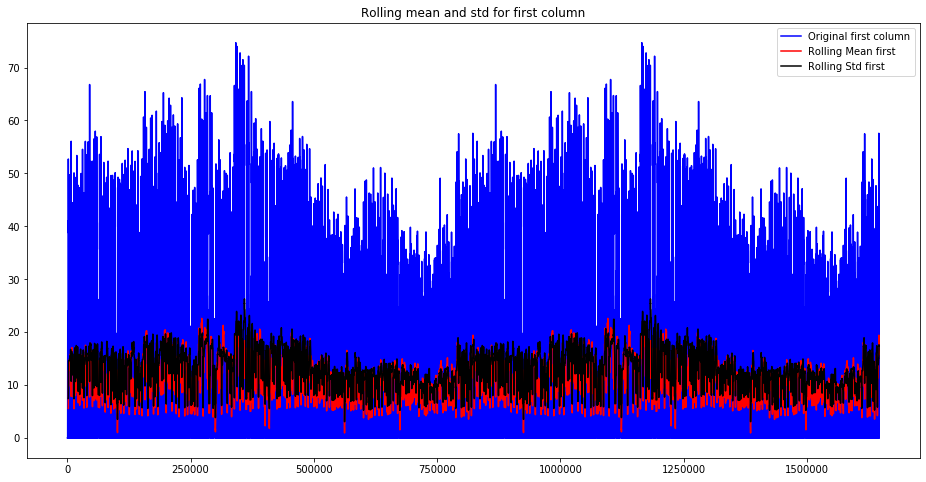

In [7]:
#plotting rolling stats
plt.figure(figsize=(16,8))
orig_first= plt.plot(first_col, color='blue', label='Original first column')
mean=plt.plot(rolmean_first, color='red', label='Rolling Mean first')
std= plt.plot(rolstd_first, color='black', label='Rolling Std first')
plt.legend(loc='best')
plt.title('Rolling mean and std for first column')
plt.show(block=False)



## The data had lot of zero values

### Dropping the zero value data of the column

In [8]:
first_col_nonzero=first_col[first_col!=0]
first_col_nonzero.shape

(471066,)

In [9]:
rolmean_first_nonzero = first_col_nonzero.rolling(window=1500).mean()
rolstd_first_nonzero=first_col_nonzero.rolling(window=1500).std()

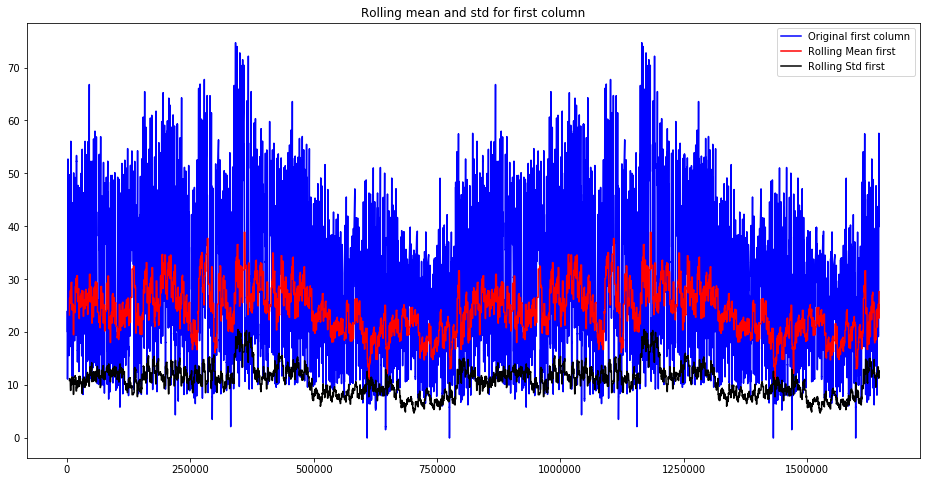

In [10]:
#plotting rolling stats
plt.figure(figsize=(16,8))
orig_first= plt.plot(first_col_nonzero, color='blue', label='Original first column')
mean=plt.plot(rolmean_first_nonzero, color='red', label='Rolling Mean first')
std= plt.plot(rolstd_first_nonzero, color='black', label='Rolling Std first')
plt.legend(loc='best')
plt.title('Rolling mean and std for first column')
plt.show(block=False)


# Converting the data into log

### Helps in data normalization
### Visualizating first 20000 data
### Only for data visualization

In [11]:
first_col_log=first_col_nonzero.to_numpy()
first_col_log=np.log(first_col_log)
first_col_log=pd.Series(first_col_log)
rolmean_first_nonzero_log = first_col_log.rolling(window=300).mean()
rolstd_first_nonzero_log=first_col_log.rolling(window=300).std()

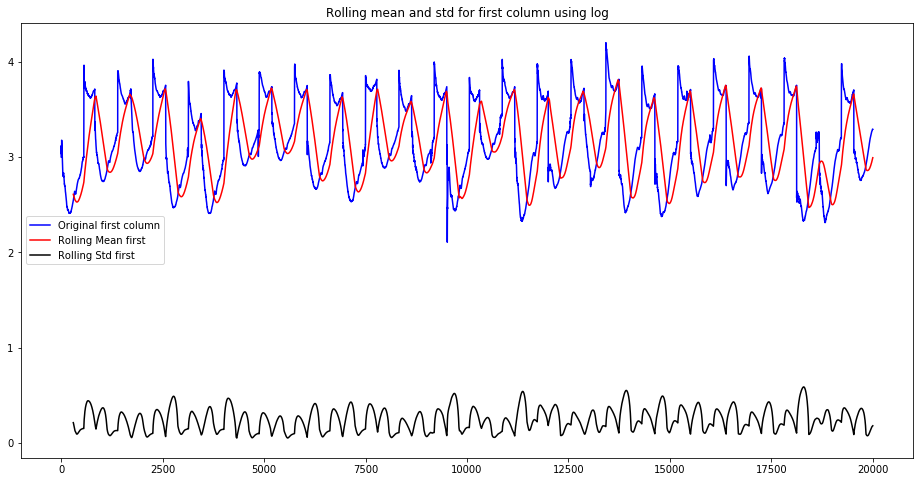

In [12]:
#plotting rolling stats
plt.figure(figsize=(16,8))
orig_first= plt.plot(first_col_log[:20000], color='blue', label='Original first column')
mean=plt.plot(rolmean_first_nonzero_log[:20000], color='red', label='Rolling Mean first')
std= plt.plot(rolstd_first_nonzero_log[:20000], color='black', label='Rolling Std first')
plt.legend(loc='best')
plt.title('Rolling mean and std for first column using log')
plt.show(block=False)


In [13]:
first_col_log.describe()

count    471066.000000
mean          3.053069
std           0.547844
min          -8.055726
25%           2.684031
50%           3.045665
75%           3.484496
max           4.313319
dtype: float64

# Using LSTM RNN model to predict the trend of 1st column

## Importing Libraries

In [14]:
from sklearn.preprocessing import MinMaxScaler

#Importing the Keras Libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.
C:\Users\aayus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aayus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aayus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\aayus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [86]:
#converting the data to array

first_col_nonzero_train=first_col_nonzero[:20000].values
type(first_col_nonzero_train)

numpy.ndarray

In [16]:
#reshaping the array into a 2d array
first_col_nonzero_train = first_col_nonzero_train.reshape(-1,1)
first_col_nonzero_train.shape


(20000, 1)

# Feature Scaling

In [17]:
# We are going to use Normalisation
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(first_col_nonzero_train)


In [18]:
training_set_scaled[:5]

array([[0.20344219],
       [0.20813858],
       [0.2303055 ],
       [0.23375521],
       [0.24427511]])

### Creating a data structure with 150 timesteps and 1 output
### 150 timesteps of past TEC data
### it analizes trend and correlation of 150 timesteps
### Using the previous 150 timesteps it tries to predict the 1501st data

In [19]:


X_train=[]
Y_train=[]
# We can use use range when its a list

for i in range(150,20000):
    # Takes the value from 0 to 1499 as the upperbound is excluded
    # We are taking form the column zero
    X_train.append(training_set_scaled[i-150:i,0])
   
    Y_train.append(training_set_scaled[i,0])

X_train=np.array(X_train)
Y_train=np.array(Y_train)


In [20]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1) )

In [21]:
X_train.shape

(19850, 150, 1)

# Initialising the RNN

In [22]:
regressor= Sequential()

In [23]:
# Adding the first LSTM layer and some Dropout regularisation
#units: no of lstm cells or memory units
# we need large number of neurons so we put 50
#return_Sequence= true because we have several lstm layer and its stacked

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))

Instructions for updating:
Colocations handled automatically by placer.


In [24]:

# 20% our neurons will be dropped
regressor.add(Dropout(0.2))

In [25]:
# Adding second LSTM layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [26]:
# Adding our Third Layer of LSTM
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [27]:
#Adding fouth Layer of LSTM

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding a output layer

In [28]:
# Creating a fully connected layer
regressor.add(Dense(units=1))

In [29]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

# Fitting the RNN to the Training set

In [30]:
regressor.fit(X_train,Y_train, epochs= 25, batch_size=32 )

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
19850/19850 [==============================] - 135s 7ms/step - loss: 0.0042
Epoch 2/25
19850/19850 [==============================] - 135s 7ms/step - loss: 0.0020
Epoch 3/25
19850/19850 [==============================] - 151s 8ms/step - loss: 0.0015
Epoch 4/25
19850/19850 [==============================] - 141s 7ms/step - loss: 0.0012
Epoch 5/25
19850/19850 [==============================] - 140s 7ms/step - loss: 0.0010
Epoch 6/25
19850/19850 [==============================] - 136s 7ms/step - loss: 9.0261e-04
Epoch 7/25
19850/19850 [==============================] - 135s 7ms/step - loss: 8.6923e-04
Epoch 8/25
19850/19850 [==============================] - 137s 7ms/step - loss: 8.5549e-04
Epoch 9/25
19850/19850 [==============================] - 136s 7ms/step - loss: 8.3778e-04
Epoch 10/25
19850/19850 [==============================] - 138s 7ms/step - loss: 8.1116e-04
Epoch 11/25
19850/19850 [==============================] - 13

# Creating a Testing Dataset

In [31]:
first_col_nonzero_test=first_col_nonzero[20000:24000].values

In [32]:
first_col_nonzero_test.shape

(4000,)

#### Visualizing the Test Dataset

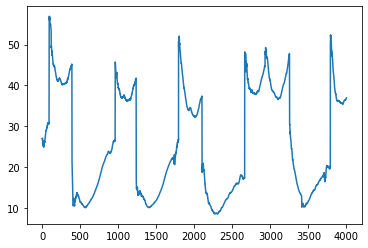

In [33]:
#reshaping the array into a 2d array
first_col_nonzero_test = first_col_nonzero_test.reshape(-1,1)
plt.plot(first_col_nonzero_test)


In [36]:
# We are going to concat both training and testing dataset
Train_150_interval=first_col_nonzero_train[-150:]
Test_150_interval=first_col_nonzero_test

In [43]:
concat_data= np.concatenate((Train_150_interval, Test_150_interval),axis=0)

In [48]:
inputs=sc.transform(concat_data)
inputs.shape[0]

4150

In [49]:
new_x_test=[]
new_y_test=[]

for i in range(150,inputs.shape[0]):
    new_x_test.append(inputs[i-150:i])
    new_y_test.append(inputs[i,0])
    

In [50]:
new_x_test=np.array(new_x_test)
new_y_test=np.array(new_y_test)
new_x_test.shape

(4000, 150, 1)

In [51]:
final_prediction=regressor.predict(new_x_test)

In [52]:
sc.scale_

array([0.01707776])

In [53]:
scaler=(1/0.01707776)
scaler

58.55568880227852

In [54]:
final_prediction=final_prediction*scaler

new_y_test=new_y_test*scaler


# Visualizing Actual Data vs Predicted Data

### The LSTM RNN will use 150 previous data points to predict 151st data point
### The process goes on and the new data will be updated

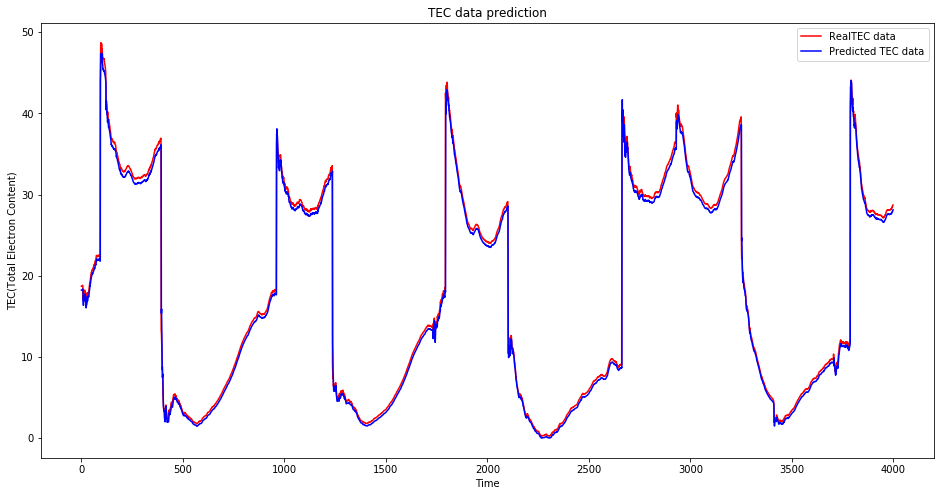

In [55]:
plt.figure(figsize=(16,8))
plt.plot(new_y_test, color='red', label="RealTEC data")
plt.plot(final_prediction, color='blue', label="Predicted TEC data")
plt.title("TEC data prediction")
plt.xlabel("Time")
plt.ylabel('TEC(Total Electron Content)')
plt.legend()
plt.show()

# Table of Actual price vs Predicted price

In [58]:
new_y_test[:10]

array([18.71469642, 18.71269642, 18.72869642, 18.73569642, 18.74569642,
       18.8066964 , 18.8156964 , 18.8156964 , 17.11669673, 16.97669675])

In [59]:
final_prediction[:10]

array([[18.234022],
       [18.254986],
       [18.259212],
       [18.27368 ],
       [18.282246],
       [18.2924  ],
       [18.35213 ],
       [18.368605],
       [18.365648],
       [16.737028]], dtype=float32)

# Using LSTM RNN to predict the data for 300 data points
### This is similar to previous model but it predicts entire new 300 data points using the previous 300 data points rather than predicting 1 data using 150 previous data

## Visualizing Training and Test Data


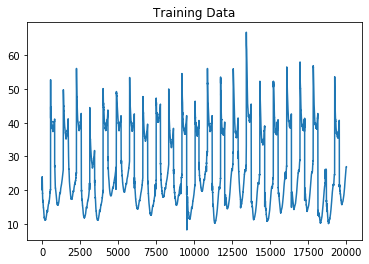

In [197]:
# Using the same training and testing dataset
plt.title("Training Data")
plt.plot(first_col_nonzero_train)

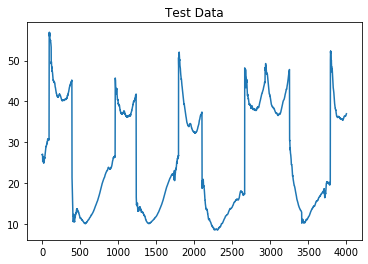

In [198]:
plt.title("Test Data")
plt.plot(first_col_nonzero_test)

In [62]:
print(first_col_nonzero_train.shape)
print(first_col_nonzero_test.shape)

(20000, 1)
(4000, 1)


# Preparing our Training Data

In [90]:
multistep_x_train, multistep_y_train=[],[]

for i in range(300, len(first_col_nonzero_train)-300):
    multistep_x_train.append(first_col_nonzero_train[i-300:i])
    multistep_y_train.append(first_col_nonzero_train[i:i+300])

In [93]:
multistep_x_train, multistep_y_train=np.array(multistep_x_train),np.array(multistep_y_train)

# Feature Scaling

In [98]:
multistep_x_train_scaled=sc.fit_transform(multistep_x_train)
multistep_y_train_scaled=sc.fit_transform(multistep_y_train)

In [100]:
multistep_x_train_scaled.shape, multistep_y_train_scaled.shape

((19400, 300), (19400, 300))

In [119]:
# Creating a 3d shape
multistep_x_train_scaled=multistep_x_train_scaled.reshape(19400,300,1)
multistep_x_train_scaled.shape

(19400, 300, 1)

## Initializing the RNN

In [147]:
reg= Sequential()
reg.add(LSTM(units=200, return_sequences=True, input_shape=(300,1)))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50, return_sequences=False))
reg.add(Dropout(0.2))

In [148]:
reg.add(Dense(units=300))

In [149]:
reg.compile(optimizer='adam',loss='mean_squared_error')


In [150]:
reg.fit(multistep_x_train_scaled,multistep_y_train_scaled, epochs= 10,batch_size=32 )

Epoch 1/10
19400/19400 [==============================] - 312s 16ms/step - loss: 0.0292
Epoch 2/10
19400/19400 [==============================] - 314s 16ms/step - loss: 0.0217
Epoch 3/10
19400/19400 [==============================] - 318s 16ms/step - loss: 0.0164
Epoch 4/10
19400/19400 [==============================] - 320s 17ms/step - loss: 0.0122
Epoch 5/10
19400/19400 [==============================] - 370s 19ms/step - loss: 0.0173
Epoch 6/10
19400/19400 [==============================] - 327s 17ms/step - loss: 0.0120
Epoch 7/10
19400/19400 [==============================] - 324s 17ms/step - loss: 0.0106
Epoch 8/10
19400/19400 [==============================] - 325s 17ms/step - loss: 0.0101
Epoch 9/10
19400/19400 [==============================] - 335s 17ms/step - loss: 0.0092
Epoch 10/10
19400/19400 [==============================] - 327s 17ms/step - loss: 0.0112


## Prepare Test Dataset


In [151]:
first_col_nonzero_test[:5]

array([[26.944],
       [26.942],
       [26.958],
       [26.965],
       [26.975]])

In [152]:
first_col_nonzero_test=np.array(first_col_nonzero_test)

In [153]:
multistep_x_test, multistep_y_test=[],[]

for i in range(300, len(first_col_nonzero_test)-300):
    multistep_x_test.append(first_col_nonzero_test[i-300:i])
    multistep_y_test.append(first_col_nonzero_test[i:i+300])

In [169]:
multistep_x_test,multistep_y_test=np.array(multistep_x_test),np.array(multistep_y_test)

In [170]:
multistep_x_test=multistep_x_test.reshape(3400,300)


In [171]:
multistep_y_test=multistep_y_test.reshape(3400,300)

In [172]:
multistep_x_test_scaled=sc.transform(multistep_x_test)
multistep_y_test_scaled=sc.transform(multistep_y_test)

In [174]:
multistep_x_test_scaled=multistep_x_test_scaled.reshape(3400,300,1)

In [176]:
multistep_y_pred=reg.predict(multistep_x_test_scaled)

In [177]:
multistep_y_pred=sc.inverse_transform(multistep_y_pred)

In [178]:
multistep_y_pred[:5]

array([[42.603653 , 42.620026 , 42.51619  , ..., 13.65468  , 13.734339 ,
        13.854786 ],
       [42.6054   , 42.621883 , 42.517647 , ..., 13.649159 , 13.729015 ,
        13.8495865],
       [42.607605 , 42.624176 , 42.51949  , ..., 13.643257 , 13.723331 ,
        13.844017 ],
       [42.610775 , 42.62739  , 42.52227  , ..., 13.637457 , 13.7177515,
        13.838529 ],
       [42.614082 , 42.630737 , 42.525208 , ..., 13.632081 , 13.712575 ,
        13.833429 ]], dtype=float32)

In [179]:
multistep_y_actual=sc.inverse_transform(multistep_y_test_scaled)

In [180]:
multistep_y_actual[:5]

array([[40.399, 40.465, 40.488, ..., 10.703, 10.719, 10.733],
       [40.465, 40.488, 40.49 , ..., 10.719, 10.733, 10.744],
       [40.488, 40.49 , 40.554, ..., 10.733, 10.744, 10.778],
       [40.49 , 40.554, 40.578, ..., 10.744, 10.778, 10.821],
       [40.554, 40.578, 40.572, ..., 10.778, 10.821, 10.856]])

# Evaluating the model

In [185]:
pd.DataFrame(multistep_y_actual)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,40.399,40.465,40.488,40.490,40.554,40.578,40.572,40.540,40.630,40.684,...,10.386,10.430,10.458,10.506,10.538,10.577,10.639,10.703,10.719,10.733
1,40.465,40.488,40.490,40.554,40.578,40.572,40.540,40.630,40.684,40.665,...,10.430,10.458,10.506,10.538,10.577,10.639,10.703,10.719,10.733,10.744
2,40.488,40.490,40.554,40.578,40.572,40.540,40.630,40.684,40.665,40.648,...,10.458,10.506,10.538,10.577,10.639,10.703,10.719,10.733,10.744,10.778
3,40.490,40.554,40.578,40.572,40.540,40.630,40.684,40.665,40.648,40.670,...,10.506,10.538,10.577,10.639,10.703,10.719,10.733,10.744,10.778,10.821
4,40.554,40.578,40.572,40.540,40.630,40.684,40.665,40.648,40.670,40.609,...,10.538,10.577,10.639,10.703,10.719,10.733,10.744,10.778,10.821,10.856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,17.941,17.939,17.993,18.006,17.944,17.947,17.938,17.931,17.902,17.963,...,36.360,36.382,36.377,36.446,36.434,36.416,36.526,36.522,36.618,36.624
3396,17.939,17.993,18.006,17.944,17.947,17.938,17.931,17.902,17.963,17.994,...,36.382,36.377,36.446,36.434,36.416,36.526,36.522,36.618,36.624,36.748
3397,17.993,18.006,17.944,17.947,17.938,17.931,17.902,17.963,17.994,18.594,...,36.377,36.446,36.434,36.416,36.526,36.522,36.618,36.624,36.748,36.718
3398,18.006,17.944,17.947,17.938,17.931,17.902,17.963,17.994,18.594,17.943,...,36.446,36.434,36.416,36.526,36.522,36.618,36.624,36.748,36.718,36.863


In [186]:
pd.DataFrame(multistep_y_pred)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,42.603653,42.620026,42.516190,42.551048,42.236755,42.380581,42.427559,42.202663,42.128471,42.085285,...,13.739574,13.763772,13.948276,13.788777,13.803417,13.913401,13.925998,13.654680,13.734339,13.854786
1,42.605400,42.621883,42.517647,42.552490,42.237747,42.381527,42.428291,42.203121,42.128944,42.085892,...,13.734120,13.758220,13.942782,13.782943,13.797635,13.907794,13.920341,13.649159,13.729015,13.849586
2,42.607605,42.624176,42.519489,42.554295,42.239048,42.382759,42.429306,42.203823,42.129642,42.086720,...,13.728228,13.752240,13.936882,13.776666,13.791427,13.901765,13.914279,13.643257,13.723331,13.844017
3,42.610775,42.627392,42.522270,42.556999,42.241268,42.384880,42.431210,42.205387,42.131199,42.088390,...,13.722455,13.746381,13.931104,13.770534,13.785349,13.895858,13.908336,13.637457,13.717752,13.838529
4,42.614082,42.630737,42.525208,42.559864,42.243675,42.387199,42.433304,42.207169,42.132965,42.090248,...,13.717106,13.740956,13.925753,13.764880,13.779725,13.890392,13.902842,13.632081,13.712575,13.833429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,25.041897,25.526340,25.716932,26.209091,26.523603,27.196888,27.665995,27.909580,27.845501,28.184757,...,28.774446,28.748995,28.715364,28.797485,28.908346,28.566311,28.609602,28.490425,28.411253,28.435984
3396,25.050852,25.535267,25.725674,26.217800,26.532187,27.205431,27.674477,27.917923,27.853764,28.192980,...,28.772242,28.746719,28.713114,28.795172,28.905960,28.563997,28.607204,28.487869,28.408722,28.433409
3397,25.055477,25.539890,25.730150,26.222240,26.536514,27.209740,27.678734,27.922039,27.857864,28.197069,...,28.769955,28.744385,28.710825,28.792856,28.903601,28.561697,28.604860,28.485451,28.406328,28.430988
3398,25.060873,25.545233,25.735340,26.227390,26.541533,27.214739,27.683662,27.926796,27.862583,28.201778,...,28.767656,28.742052,28.708492,28.790489,28.901178,28.559299,28.602427,28.482941,28.403828,28.428438


In [188]:
flatten_actual=multistep_y_actual.flatten()

In [189]:
flatten_prediction=multistep_y_pred.flatten()

# Actual data vs predicted data
### It only displays first 300 predicted data vs real data

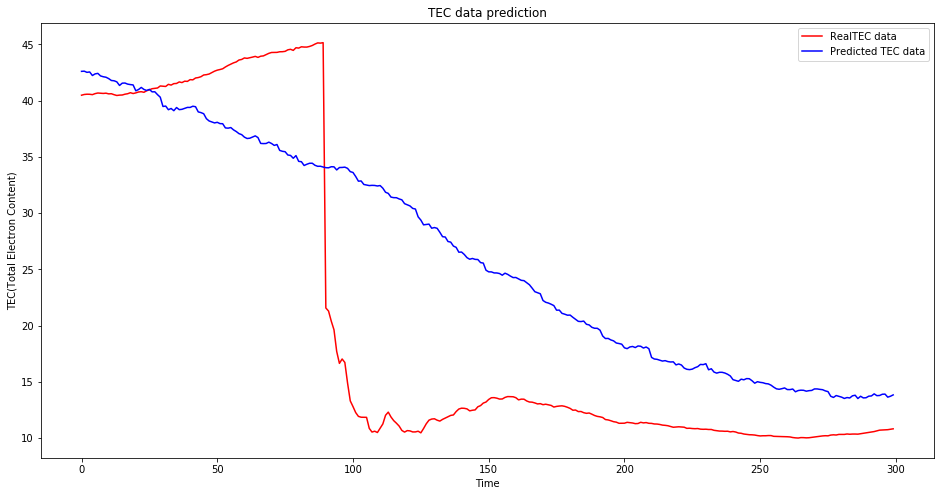

In [196]:
plt.figure(figsize=(16,8))
plt.plot(flatten_actual[900:1200], color='red', label="RealTEC data")
plt.plot(flatten_prediction[900:1200], color='blue', label="Predicted TEC data")
plt.title("TEC data prediction")
plt.xlabel("Time")
plt.ylabel('TEC(Total Electron Content)')
plt.legend()
plt.show()